In [1]:
from random import randint
import glob
from faker import Faker
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")
import pandas as pd
import sys
import os

fake = Faker()
Faker.seed(0)
path = '../AMLSim/outputs/10K'
csvList = sorted(glob.glob('../AMLSim/outputs/10K/*.csv'))
print(csvList)


['../AMLSim/outputs/10K/accountMapping.csv', '../AMLSim/outputs/10K/accounts.csv', '../AMLSim/outputs/10K/alert_accounts.csv', '../AMLSim/outputs/10K/alert_transactions.csv', '../AMLSim/outputs/10K/cash_tx.csv', '../AMLSim/outputs/10K/individuals-bulkload.csv', '../AMLSim/outputs/10K/organizations-bulkload.csv', '../AMLSim/outputs/10K/resolvedentities.csv', '../AMLSim/outputs/10K/sar_accounts.csv', '../AMLSim/outputs/10K/transactions.csv']


In [2]:
df = pd.read_csv(csvList[0])


In [3]:
# df.bank_id.unique()


In [4]:
pd.read_csv(csvList[1]).columns

Index(['acct_id', 'dsply_nm', 'type', 'acct_stat', 'acct_rptng_crncy',
       'prior_sar_count', 'branch_id', 'open_dt', 'close_dt',
       'initial_deposit', 'tx_behavior_id', 'bank_id', 'first_name',
       'last_name', 'street_addr', 'city', 'state', 'country', 'zip', 'gender',
       'birth_date', 'ssn', 'lon', 'lat'],
      dtype='object')

In [5]:
accountMapping = pd.read_csv(csvList[8])
accountMapping.head()

,ALERT_ID,MAIN_ACCOUNT_ID,MAIN_CUSTOMER_ID,EVENT_DATE,ALERT_TYPE,ACCOUNT_TYPE,IS_SAR
0,0,7781,C_7781,20170121,cycle,INDIVIDUAL,YES
1,1,4915,C_4915,20170212,cycle,INDIVIDUAL,YES
2,2,3745,C_3745,20170110,cycle,INDIVIDUAL,YES
3,3,8296,C_8296,20170105,fan_in,INDIVIDUAL,YES
4,4,5233,C_5233,20170217,cycle,INDIVIDUAL,YES


In [6]:
accounts = pd.read_csv(csvList[1])
accounts.head()


,acct_id,dsply_nm,type,acct_stat,acct_rptng_crncy,prior_sar_count,branch_id,open_dt,close_dt,initial_deposit,...,street_addr,city,state,country,zip,gender,birth_date,ssn,lon,lat
0,0,C_0,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,92221.09,...,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
1,1,C_1,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,87897.72,...,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
2,2,C_2,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,71028.58,...,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
3,3,C_3,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,62945.84,...,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
4,4,C_4,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,75563.74,...,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
## variables
gender = 0
fname = []
lname = []
genderArr = []
city = []
str_address = []
birthdates = []
# full_address = []
temp = []
zip_code = []
state = []
ssn_set = set()
ssn_list = []
display_name = []

def getAddress():
    retval = []
    try:
        temp = fake.address()
        temp = temp.split("\n")
        retval.append(temp[0]) ## appends street address
        temp = temp[1].split(",")
        retval.append(temp[0]) ## appends city
        temp = temp[1].split()
        retval.append(temp[0]) ## appends state
        retval.append(temp[1]) ## appends zip code

        error = False
    except:
        error = True

    return error, retval

def get_ssn():
    retval = fake.ssn()
    if retval in ssn_set:
        error = True
        return error, retval
    else:
        error = False
        return error, retval

for name in range(len(accounts)):

    gender = randint(0,1)

    err, ret = getAddress()

    while err:
        err, ret = getAddress()

    str_address.append(ret[0])
    city.append(ret[1])
    state.append(ret[2])
    zip_code.append(ret[3])
    birthdates.append(fake.date_of_birth(minimum_age = 18, maximum_age = 80))
    
    err, ret = get_ssn()
    while err:
        err, ret = get_ssn()

    ssn_set.add(ret)
    
    if gender == 1:
        genderArr.append('M')
        fname.append(fake.first_name_male())
        lname.append(fake.last_name())
        # display_name.append(fname[-1] + lname[-1])
        # break

        
    else:
        genderArr.append('F')
        fname.append(fake.first_name_female())
        lname.append(fake.last_name())
        # display_name.append(fname[-1] + lname[-1])
        # break
    display_name.append(fname[-1] + lname[-1])
    # print(display_name[-1])

ssn_list = list(ssn_set)


accounts['gender'] = pd.Series(genderArr)
accounts['first_name'] = pd.Series(fname)
accounts['last_name'] = pd.Series(lname)
accounts['street_addr'] = pd.Series(str_address)
accounts['city'] = pd.Series(city)
accounts['state'] = pd.Series(state)
accounts['zip'] = pd.Series(zip_code)
accounts['ssn'] = pd.Series(ssn_list)
accounts['birth_date'] = pd.Series(birthdates)
accounts['dsply_nm'] = pd.Series(display_name)


In [8]:
transactions = pd.read_csv(csvList[-1])
transactions.head()

,tran_id,orig_acct,bene_acct,tx_type,base_amt,tran_timestamp,is_sar,alert_id
0,1,2910,559,TRANSFER,915.43,2017-01-01T00:00:00Z,False,-1
1,2,7248,9998,TRANSFER,719.60,2017-01-01T00:00:00Z,False,-1
2,3,5900,8152,TRANSFER,931.53,2017-01-01T00:00:00Z,False,-1
3,4,1033,1655,TRANSFER,483.24,2017-01-01T00:00:00Z,False,-1
4,5,8122,8810,TRANSFER,504.92,2017-01-01T00:00:00Z,False,-1


False    88109
True       705
Name: is_sar, dtype: int64


Text(0.5, 1.0, 'Data Imbalance')

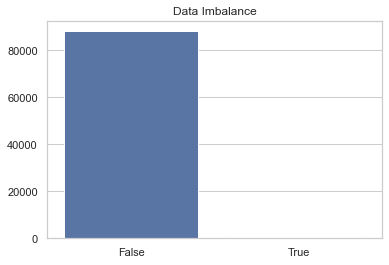

In [9]:
x = transactions['is_sar'].value_counts().index
y = transactions['is_sar'].value_counts().values
print(transactions['is_sar'].value_counts())
ax = sns.barplot(x=x, y=y)
ax.set_title('Data Imbalance')


   tran_id  orig_acct  bene_acct   tx_type  base_amt        tran_timestamp  \
0        1       2910        559  TRANSFER    915.43  2017-01-01T00:00:00Z   
1        2       7248       9998  TRANSFER    719.60  2017-01-01T00:00:00Z   
2        3       5900       8152  TRANSFER    931.53  2017-01-01T00:00:00Z   
3        4       1033       1655  TRANSFER    483.24  2017-01-01T00:00:00Z   
4        5       8122       8810  TRANSFER    504.92  2017-01-01T00:00:00Z   

   is_sar  alert_id  
0   False        -1  
1   False        -1  
2   False        -1  
3   False        -1  
4   False        -1  


<AxesSubplot:xlabel='orig_acct', ylabel='Density'>

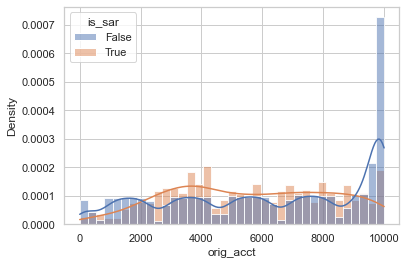

In [10]:
print(transactions.head())
sns.histplot(data=transactions, x='orig_acct', hue='is_sar',
             stat='density', common_norm=False, kde=True)


<AxesSubplot:xlabel='bene_acct', ylabel='Density'>

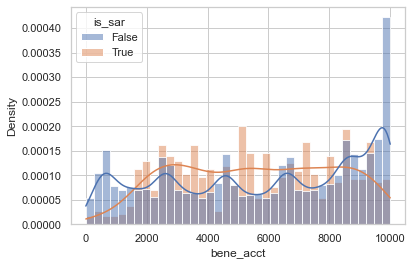

In [11]:

sns.histplot(data=transactions, x='bene_acct', hue='is_sar',
             stat='density', common_norm=False, kde=True)

<AxesSubplot:xlabel='base_amt', ylabel='Density'>

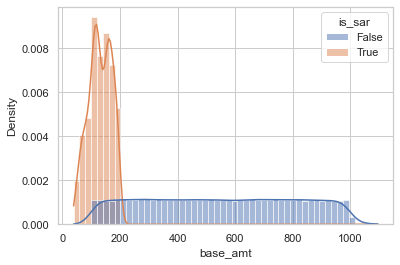

In [12]:
sns.histplot(data=transactions, x='base_amt', hue='is_sar',
             stat='density', common_norm=False, kde=True)


<AxesSubplot:xlabel='orig_acct', ylabel='Density'>

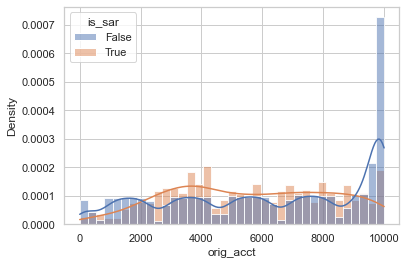

In [13]:

sns.histplot(data=transactions, x='orig_acct', hue='is_sar',
             stat='density', common_norm=False, kde=True)


<AxesSubplot:ylabel='Count'>

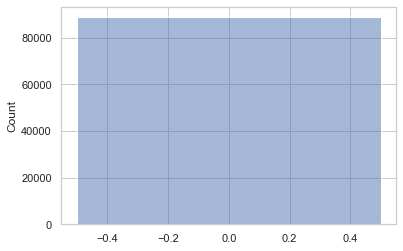

In [14]:
tx_type = pd.Categorical(transactions['tx_type'])
sns.histplot(data=tx_type.codes, kde = True)


<AxesSubplot:xlabel='tran_timestamp', ylabel='Density'>

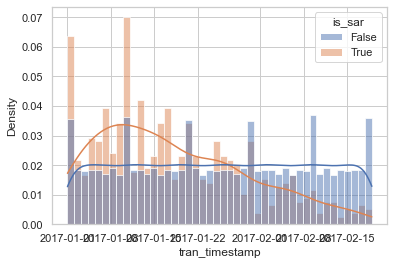

In [15]:
transactions['tran_timestamp'] = pd.to_datetime(transactions['tran_timestamp'])
sns.histplot(data=transactions, x='tran_timestamp', hue='is_sar',
            stat='density', common_norm=False, kde=True)


In [16]:
orig_acct = pd.merge(transactions, accounts, how='left', left_on=['orig_acct'], right_on=['acct_id'])
pd.set_option('display.max_columns', None)
orig_acct.head()


,tran_id,orig_acct,bene_acct,tx_type,base_amt,tran_timestamp,is_sar,alert_id,acct_id,dsply_nm,type,acct_stat,acct_rptng_crncy,prior_sar_count,branch_id,open_dt,close_dt,initial_deposit,tx_behavior_id,bank_id,first_name,last_name,street_addr,city,state,country,zip,gender,birth_date,ssn,lon,lat
0,1,2910,559,TRANSFER,915.43,2017-01-01 00:00:00+00:00,False,-1,2910,SteveFigueroa,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,94491.80,3,bank_1,Steve,Figueroa,00147 Emma Brook,Port Jackie,HI,US,22141,M,1959-10-08,591-46-2991,NaN,NaN
1,2,7248,9998,TRANSFER,719.60,2017-01-01 00:00:00+00:00,False,-1,7248,ChristopherThomas,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,70399.39,4,bank_3,Christopher,Thomas,44046 Graves Gardens,Christopherborough,TN,US,20555,M,1962-03-02,806-96-9048,NaN,NaN
2,3,5900,8152,TRANSFER,931.53,2017-01-01 00:00:00+00:00,False,-1,5900,MichaelMoreno,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,62874.51,5,bank_3,Michael,Moreno,445 Rowe Islands Apt. 311,South Kimberly,CO,US,97491,M,1961-05-24,415-79-9507,NaN,NaN
3,4,1033,1655,TRANSFER,483.24,2017-01-01 00:00:00+00:00,False,-1,1033,CatherineMcintosh,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,96185.16,3,bank_0,Catherine,Mcintosh,2269 Shawn Square,West Steven,FL,US,84220,F,1956-08-24,218-29-3783,NaN,NaN
4,5,8122,8810,TRANSFER,504.92,2017-01-01 00:00:00+00:00,False,-1,8122,DaisyBrown,SAV,A,USD,True,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,86650.03,1,bank_4,Daisy,Brown,649 Shawn Ranch,Port Stephen,NE,US,36987,F,1967-06-06,262-26-2108,NaN,NaN


In [17]:
accounts

,acct_id,dsply_nm,type,acct_stat,acct_rptng_crncy,prior_sar_count,branch_id,open_dt,close_dt,initial_deposit,tx_behavior_id,bank_id,first_name,last_name,street_addr,city,state,country,zip,gender,birth_date,ssn,lon,lat
0,0,StephanieSutton,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,92221.09,1,bank_0,Stephanie,Sutton,48764 Howard Forge Apt. 421,Vanessaside,PA,US,19763,F,1962-04-25,886-45-8324,NaN,NaN
1,1,LisaClayton,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,87897.72,1,bank_0,Lisa,Clayton,6593 Ramos Pike,Bryanside,AL,US,12726,F,1990-03-09,684-06-3423,NaN,NaN
2,2,VictorMorrison,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,71028.58,1,bank_0,Victor,Morrison,139 John Divide Suite 115,Rodriguezside,VT,US,16860,M,1978-06-18,437-49-7103,NaN,NaN
3,3,MichaelMassey,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,62945.84,1,bank_0,Michael,Massey,96593 White View Apt. 094,Jonesberg,FL,US,05565,M,1998-07-16,383-45-4877,NaN,NaN
4,4,AlexisNelson,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,75563.74,1,bank_0,Alexis,Nelson,96947 Keller Squares,Christopherville,OR,US,83095,F,1964-01-10,043-10-8832,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,RobertBright,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,98588.57,5,bank_4,Robert,Bright,412 Acosta Loaf,Jimmyside,MT,US,50518,M,1942-03-21,333-97-6693,NaN,NaN
9996,9996,TeresaHart,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,86243.84,5,bank_4,Teresa,Hart,82145 Roberts Spur Suite 282,West Carlamouth,WV,US,24107,F,1975-05-12,610-88-8411,NaN,NaN
9997,9997,AlexisCarter,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,65212.40,5,bank_4,Alexis,Carter,0986 Hoover Pines Suite 034,Baileychester,GA,US,07541,F,1959-06-27,210-89-2650,NaN,NaN
9998,9998,EmilyRamos,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,80948.44,5,bank_4,Emily,Ramos,695 Rhonda Harbor Apt. 582,Lake Pamelaville,SC,US,51855,F,1980-10-21,546-92-4179,NaN,NaN


<AxesSubplot:xlabel='initial_deposit', ylabel='Density'>

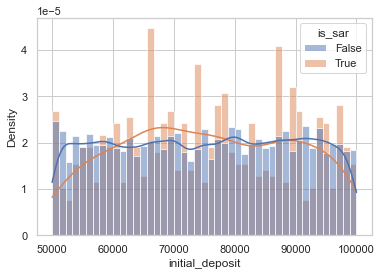

In [18]:


sns.histplot(data=orig_acct, x='initial_deposit', hue='is_sar',
            stat='density', common_norm=False, kde=True)



0        7870
1        1736
2        6102
3        1399
4        1962
         ... 
88809    7035
88810    3102
88811    3107
88812    1840
88813    2571
Length: 88814, dtype: int16


<AxesSubplot:xlabel='dsply_nm', ylabel='Density'>

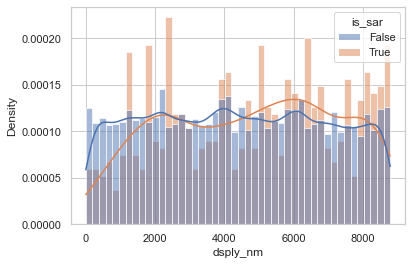

In [19]:
orig_acct['dsply_nm'] = orig_acct.dsply_nm.astype('category')
print(orig_acct['dsply_nm'].cat.codes)
orig_acct['dsply_nm'] = orig_acct['dsply_nm'].cat.codes
sns.histplot(data=orig_acct, x='dsply_nm', hue='is_sar',
             stat='density', common_norm=False, kde=True)


In [20]:
bene_acct = pd.merge(transactions, accounts, how='left',
                     left_on=['bene_acct'], right_on=['acct_id'])
pd.set_option('display.max_columns', None)
bene_acct.head()


,tran_id,orig_acct,bene_acct,tx_type,base_amt,tran_timestamp,is_sar,alert_id,acct_id,dsply_nm,type,acct_stat,acct_rptng_crncy,prior_sar_count,branch_id,open_dt,close_dt,initial_deposit,tx_behavior_id,bank_id,first_name,last_name,street_addr,city,state,country,zip,gender,birth_date,ssn,lon,lat
0,1,2910,559,TRANSFER,915.43,2017-01-01 00:00:00+00:00,False,-1,559,PamelaKelly,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,70861.27,2,bank_0,Pamela,Kelly,058 Felicia Street,Holmesville,MI,US,37504,F,1954-11-30,605-24-4415,NaN,NaN
1,2,7248,9998,TRANSFER,719.60,2017-01-01 00:00:00+00:00,False,-1,9998,EmilyRamos,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,80948.44,5,bank_4,Emily,Ramos,695 Rhonda Harbor Apt. 582,Lake Pamelaville,SC,US,51855,F,1980-10-21,546-92-4179,NaN,NaN
2,3,5900,8152,TRANSFER,931.53,2017-01-01 00:00:00+00:00,False,-1,8152,JosephMcintosh,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,73134.05,1,bank_4,Joseph,Mcintosh,433 Tim Avenue Suite 304,Garrisonmouth,TX,US,41871,M,2001-09-22,421-61-5187,NaN,NaN
3,4,1033,1655,TRANSFER,483.24,2017-01-01 00:00:00+00:00,False,-1,1655,KristinYoder,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,83710.20,5,bank_0,Kristin,Yoder,939 Parrish Ramp,Lisaburgh,MN,US,19650,F,1951-04-14,585-79-5751,NaN,NaN
4,5,8122,8810,TRANSFER,504.92,2017-01-01 00:00:00+00:00,False,-1,8810,MaryBrooks,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,60575.95,3,bank_4,Mary,Brooks,7869 Elliott Neck,Port Rachel,NY,US,29764,F,1982-08-16,157-82-8227,NaN,NaN


In [21]:
bene_acct = pd.merge(transactions, accounts, how='left',
                     left_on=['orig_acct'], right_on=['acct_id'])
pd.set_option('display.max_columns', None)
bene_acct.tail()


,tran_id,orig_acct,bene_acct,tx_type,base_amt,tran_timestamp,is_sar,alert_id,acct_id,dsply_nm,type,acct_stat,acct_rptng_crncy,prior_sar_count,branch_id,open_dt,close_dt,initial_deposit,tx_behavior_id,bank_id,first_name,last_name,street_addr,city,state,country,zip,gender,birth_date,ssn,lon,lat
88809,88810,4821,1468,TRANSFER,984.33,2017-02-19 00:00:00+00:00,False,-1,4821,RickLewis,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,79755.76,3,bank_2,Rick,Lewis,199 Stevenson Mission,Herreramouth,OR,US,98363,M,1955-06-05,186-49-0131,NaN,NaN
88810,88811,4802,2757,TRANSFER,645.74,2017-02-19 00:00:00+00:00,False,-1,4802,HannahMccall,SAV,A,USD,True,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,82242.83,3,bank_2,Hannah,Mccall,709 Smith Greens Suite 705,Toddside,MO,US,25019,F,1986-12-14,573-69-1742,NaN,NaN
88811,88812,3314,8793,TRANSFER,903.69,2017-02-19 00:00:00+00:00,False,-1,3314,HannahWest,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,92820.28,4,bank_1,Hannah,West,8422 Jose Motorway Apt. 390,West Erikastad,SD,US,87405,F,2003-06-30,163-31-0981,NaN,NaN
88812,88813,3818,7709,TRANSFER,170.25,2017-02-19 00:00:00+00:00,False,-1,3818,CoreyBenson,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,54151.70,5,bank_1,Corey,Benson,908 Paul Plain,Padillaport,OH,US,88794,M,1942-11-19,007-64-0546,NaN,NaN
88813,88814,7847,4569,TRANSFER,858.40,2017-02-19 00:00:00+00:00,False,-1,7847,EarlPorter,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,63877.60,5,bank_3,Earl,Porter,42188 Lutz Crossroad Suite 993,Michealview,MI,US,34408,M,1987-10-18,254-35-6276,NaN,NaN


<AxesSubplot:xlabel='initial_deposit', ylabel='Density'>

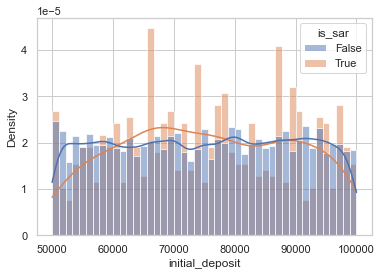

In [22]:
sns.histplot(data=bene_acct, x='initial_deposit', hue='is_sar',
             stat='density', common_norm=False, kde=True)


0        7870
1        1736
2        6102
3        1399
4        1962
         ... 
88809    7035
88810    3102
88811    3107
88812    1840
88813    2571
Length: 88814, dtype: int16


<AxesSubplot:xlabel='dsply_nm', ylabel='Density'>

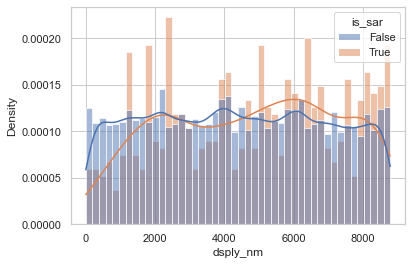

In [23]:
bene_acct['dsply_nm'] = bene_acct.dsply_nm.astype('category')
print(bene_acct['dsply_nm'].cat.codes)
bene_acct['dsply_nm'] = bene_acct['dsply_nm'].cat.codes
sns.histplot(data=bene_acct, x='dsply_nm', hue='is_sar',
             stat='density', common_norm=False, kde=True)


In [24]:
from datetime import datetime, timedelta, time
def timefunc(x):
    start = datetime.combine(x.date(), time.min)
    end = datetime.combine(x.date(), time.max)
    return fake.date_time_between(start_date=start, end_date=end)


transactions['tran_timestamp'] = transactions['tran_timestamp'].apply(timefunc)
transactions


,tran_id,orig_acct,bene_acct,tx_type,base_amt,tran_timestamp,is_sar,alert_id
0,1,2910,559,TRANSFER,915.43,2017-01-01 16:43:17,False,-1
1,2,7248,9998,TRANSFER,719.60,2017-01-01 01:53:50,False,-1
2,3,5900,8152,TRANSFER,931.53,2017-01-01 18:59:40,False,-1
3,4,1033,1655,TRANSFER,483.24,2017-01-01 13:35:36,False,-1
4,5,8122,8810,TRANSFER,504.92,2017-01-01 07:32:51,False,-1
...,...,...,...,...,...,...,...,...
88809,88810,4821,1468,TRANSFER,984.33,2017-02-19 01:18:29,False,-1
88810,88811,4802,2757,TRANSFER,645.74,2017-02-19 08:51:40,False,-1
88811,88812,3314,8793,TRANSFER,903.69,2017-02-19 23:17:06,False,-1
88812,88813,3818,7709,TRANSFER,170.25,2017-02-19 15:27:17,False,-1


In [25]:
newtrans = pd.merge(transactions, accounts[['acct_id','branch_id','bank_id']], how='inner', left_on=['orig_acct'], right_on=['acct_id']).rename(columns = {'bank_id': 'orig_bank_id', 'branch_id': 'orig_branch_id'}).drop(columns = 'acct_id')
new2trans = pd.merge(newtrans, accounts[['acct_id','branch_id','bank_id']], how='inner', left_on=['bene_acct'], right_on=['acct_id']).rename(columns = {'bank_id': 'bene_bank_id', 'branch_id': 'bene_branch_id'}).drop(columns = 'acct_id')

In [26]:
new2trans.tran_timestamp.unique()

array(['2017-01-01T16:43:17.000000000', '2017-01-08T01:26:37.000000000',
       '2017-01-15T23:52:42.000000000', ...,
       '2017-02-11T03:49:11.000000000', '2017-02-18T01:58:48.000000000',
       '2017-02-04T14:17:43.000000000'], dtype='datetime64[ns]')

In [27]:
transactions

,tran_id,orig_acct,bene_acct,tx_type,base_amt,tran_timestamp,is_sar,alert_id
0,1,2910,559,TRANSFER,915.43,2017-01-01 16:43:17,False,-1
1,2,7248,9998,TRANSFER,719.60,2017-01-01 01:53:50,False,-1
2,3,5900,8152,TRANSFER,931.53,2017-01-01 18:59:40,False,-1
3,4,1033,1655,TRANSFER,483.24,2017-01-01 13:35:36,False,-1
4,5,8122,8810,TRANSFER,504.92,2017-01-01 07:32:51,False,-1
...,...,...,...,...,...,...,...,...
88809,88810,4821,1468,TRANSFER,984.33,2017-02-19 01:18:29,False,-1
88810,88811,4802,2757,TRANSFER,645.74,2017-02-19 08:51:40,False,-1
88811,88812,3314,8793,TRANSFER,903.69,2017-02-19 23:17:06,False,-1
88812,88813,3818,7709,TRANSFER,170.25,2017-02-19 15:27:17,False,-1


In [28]:
newaccounts = accounts.copy()
newaccounts.acct_id = np.tile(np.arange(len(accounts[accounts.bank_id == 'bank_' +str(1)])), 5)
mappingDict = {key: value for (key, value) in zip(accounts.acct_id, newaccounts.acct_id)}

In [29]:
new3trans = new2trans.replace({"orig_acct": mappingDict, "bene_acct": mappingDict})

In [30]:
# for i in range(5):
#     accounts[accounts.bank_id == 'bank_' +
#              str(i)].to_csv('accounts_' + str(i) + '.csv', index=False)
for i in range(5):
    newaccounts[newaccounts.bank_id == 'bank_' +
             str(i)].to_csv('accounts_' + str(i) + '.csv', index=False)


In [31]:
# for i in range(5):
    # transactions[transactions.orig_acct.isin(accounts.acct_id[accounts.bank_id == 'bank_' + str(i)]) | transactions.bene_acct.isin(accounts.acct_id[accounts.bank_id == 'bank_0' + str(i)])].to_csv('transactions_' + str(i) + '.csv', index = False)
for i in range(5):
    new3trans[(new3trans.orig_bank_id == 'bank_' + str(i)) | (new3trans.bene_bank_id == 'bank_' + str(i))].to_csv('transactions_' + str(i) + '.csv', index = False)